## This notebook combines tables made in previous steps for new analyses

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px

## Config

In [2]:
import configparser
config = configparser.ConfigParser()
config.read("../../env.ini")
data_home  = config['DEFAULT']['data_home']
output_dir = config['DEFAULT']['output_dir']

## Correlate PCA DCM and human rated scores 

In [3]:
lib = pd.read_csv(f"{output_dir}/library_personbysession.csv").set_index(['personid','session'])
pca_dcm = pd.read_csv(f"{output_dir}/pca_dcm.csv").set_index(['personid','session'])

In [4]:
dcm_lib = pca_dcm.join(lib, on=['personid','session'], how ='left').dropna()

In [5]:
dcm_lib.head(5)

0         1         2         3         4  \
personid    session                                                     
JMU_F22_002 0.0     -0.306740 -0.098149  0.114683  0.149703  0.021101   
            1.0      0.408326 -0.299430  0.168382  0.051834  0.051842   
JMU_F22_005 0.0     -0.337981 -0.133178 -0.090269  0.169782 -0.077044   
            1.0      0.323920 -0.245756  0.028460  0.083493 -0.005626   
JMU_F22_009 0.0     -0.400235 -0.116671  0.025029  0.039661 -0.150547   

                            5         6         7         8         9  ...  \
personid    session                                                    ...   
JMU_F22_002 0.0     -0.025828  0.078490  0.018023 -0.106262  0.007777  ...   
            1.0      0.011997  0.091842  0.021551 -0.006849 -0.018559  ...   
JMU_F22_005 0.0     -0.072884 -0.067575 -0.037367 -0.047386 -0.078290  ...   
            1.0     -0.132908 -0.099726 -0.051558 -0.025440 -0.000716  ...   
JMU_F22_009 0.0      0.103229 -0.063880 -0.042177  0.056614  0.006559  ...   

                     unpacking  selfinstruction  selfregulation  ending  \
personid    session                                                       
JMU_F22_002 0.0       1.666667         1.000000        1.000000    1.00   
            1.0       1.333333         1.000000        1.500000    1.00   
JMU_F22_005 0.0       1.833333         1.333333        1.000000    1.00   
            1.0       1.666667         1.500000        1.166667    1.00   
JMU_F22_009 0.0       2.000000         1.000000        1.000000    1.25   

                     accuracy  avg_score                          metadata  \
personid    session                                                          
JMU_F22_002 0.0      2.333333   1.361111   Tue, Oct 18, 2022 3:32PM • 4:46   
            1.0      1.666667   1.250000  Tue, Dec 20, 2022 11:08AM • 2:36   
JMU_F22_005 0.0      2.000000   1.388889   Tue, Oct 18, 2022 3:33PM • 5:00   
            1.0      1.833333   1.444444  Tue, Dec 20, 2022 11:08AM • 2:57   
JMU_F22_009 0.0      1.750000   1.375000   Tue, Oct 18, 2022 3:34PM • 4:54   

                    site course  treatment_status  
personid    session                                
JMU_F22_002 0.0      JMU    F22  Non-Experimental  
            1.0      JMU    F22  Non-Experimental  
JMU_F22_005 0.0      JMU    F22  Non-Experimental  
            1.0      JMU    F22  Non-Experimental  
JMU_F22_009 0.0      JMU    F22  Non-Experimental  

[5 rows x 21 columns]

In [6]:
subset_df = dcm_lib.iloc[:, :17]
correlation_matrix = subset_df.corr()

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.savefig(f"{output_dir}/01_figures/riff1.png")
plt.close()

## Dendrogram for teaching skill performance session 

In [28]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [29]:
w2v_0pre = pd.read_csv(f"{output_dir}/w2v_0pre.csv").set_index('term_str')
w2v_1post = pd.read_csv(f"{output_dir}/w2v_1post.csv").set_index('term_str')
w2v_2classroom = pd.read_csv(f"{output_dir}/w2v_2classroom.csv").set_index('term_str')

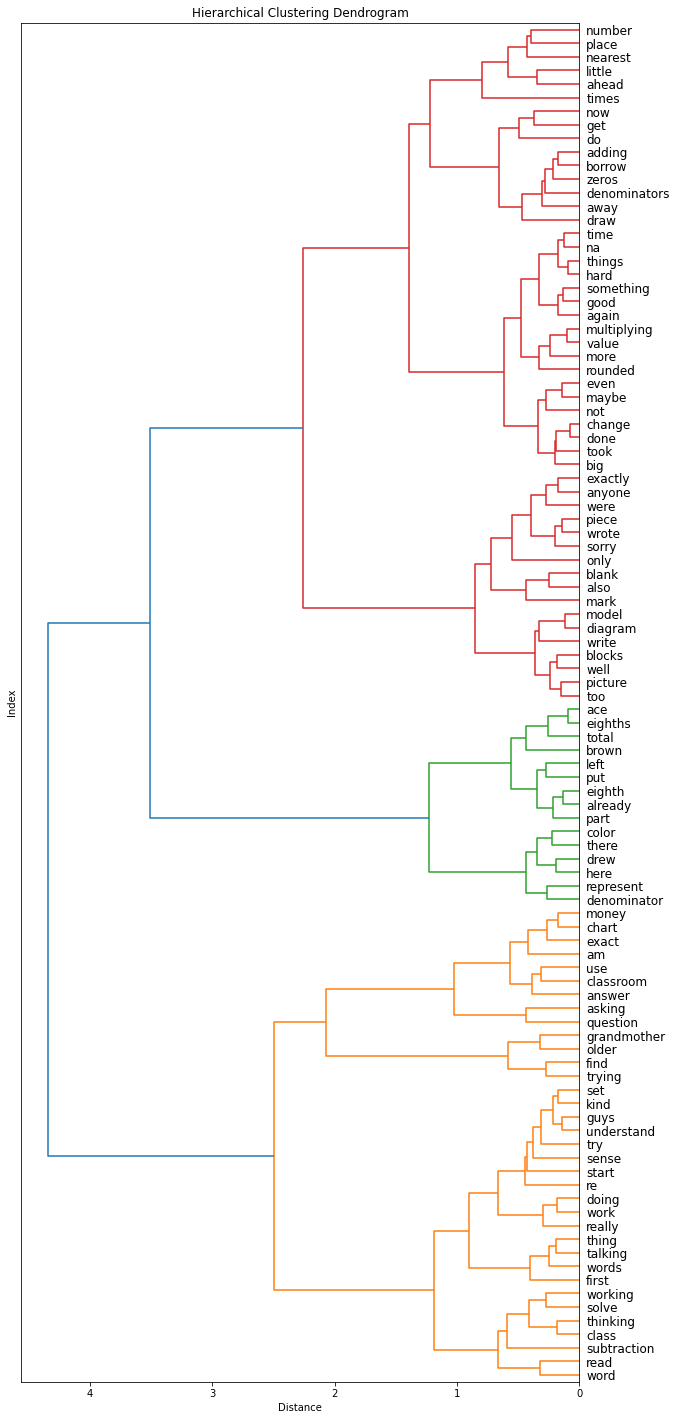

In [30]:
sampled_0pre = w2v_0pre.sample(n=100, replace=False,random_state=42)
Z = linkage(sampled_0pre, method='ward')
# Plot the dendrogram
plt.figure(figsize=(10, 25))
dendrogram(Z, labels=sampled_0pre.index, leaf_rotation=0, leaf_font_size=12, orientation='left')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Distance')
plt.ylabel('Index')
plt.show()

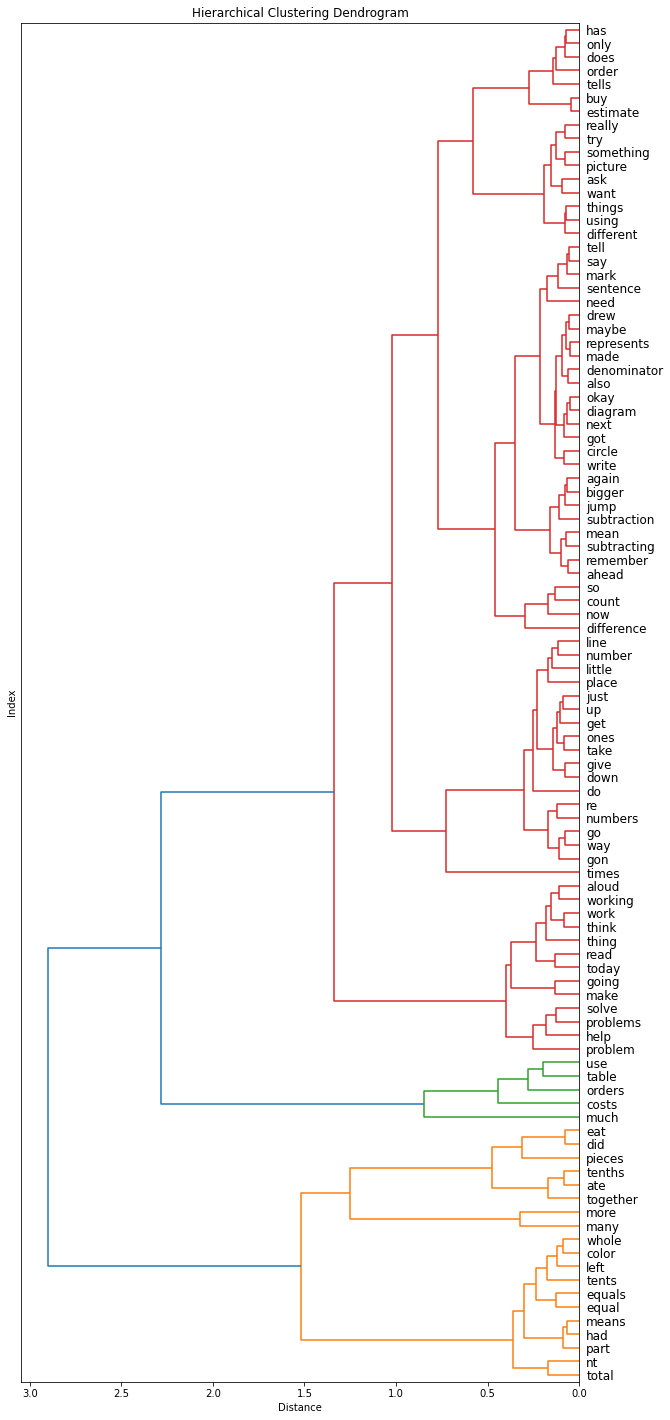

In [31]:
sampled_1post = w2v_1post.sample(n=100, replace=False,random_state=42)
Z = linkage(sampled_1post, method='ward')
# Plot the dendrogram
plt.figure(figsize=(10, 25))
dendrogram(Z, labels=sampled_1post.index, leaf_rotation=0, leaf_font_size=12, orientation='left')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Distance')
plt.ylabel('Index')
plt.show()

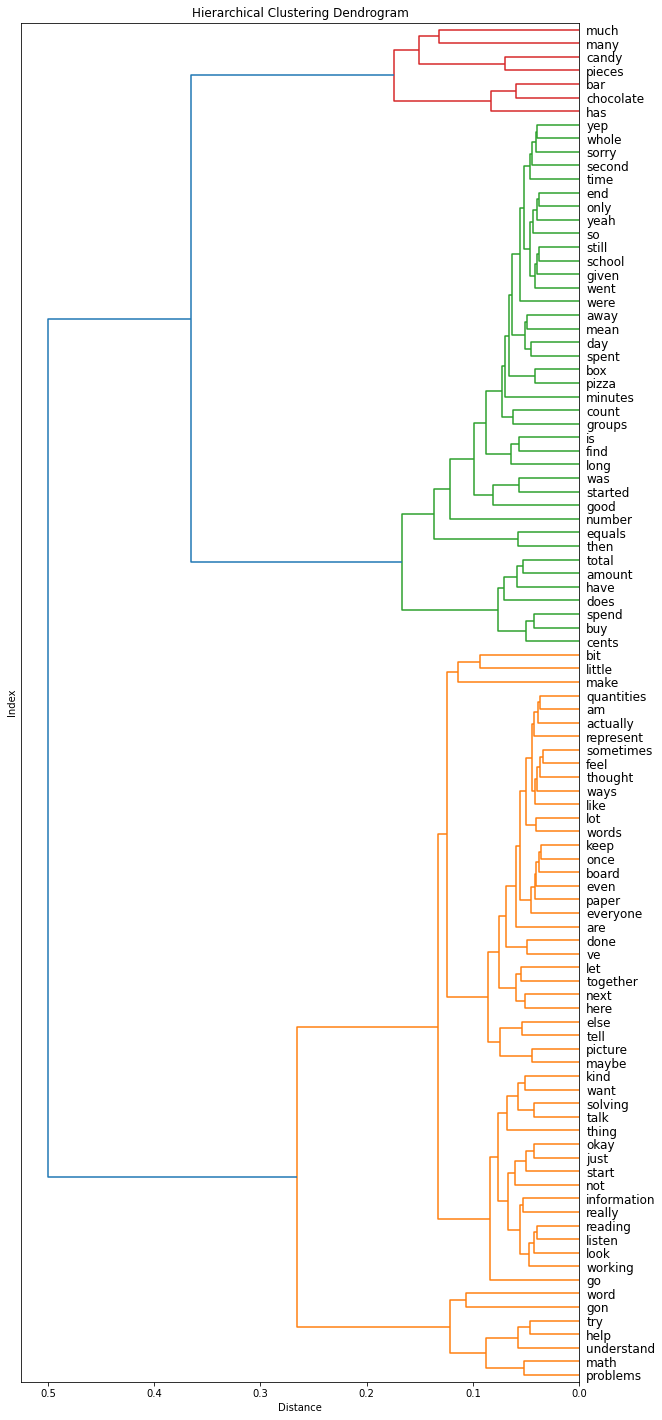

In [33]:
sampled_2classroom = w2v_2classroom.sample(n=100, replace=False,random_state=42)
Z = linkage(sampled_2classroom, method='ward')
# Plot the dendrogram
plt.figure(figsize=(10, 25))
dendrogram(Z, labels=sampled_2classroom.index, leaf_rotation=0, leaf_font_size=12, orientation='left')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Distance')
plt.ylabel('Index')
plt.show()
plt.savefig(f"{output_dir}/01_figures/riff2.png")
plt.close()

## Scatter Plots of words associated with high PCA component scores and average human rater scores

In [13]:
lib = pd.read_csv(f"{output_dir}/library_personbysession.csv").set_index(['personid','session'])
pca_loadings = pd.read_csv(f"{output_dir}/pca_loadings.csv") #.set_index(['term_str'])
corpus = pd.read_csv(f"{output_dir}/corpus.csv") #.set_index(['personid','session','task', 'sent_num', 'token_num'])

In [14]:
loadings_corpus = pd.merge(pca_loadings, corpus, how='left', on='term_str').dropna()

In [15]:
loadings_corpus.head(5)

,term_str,0,1,2,3,4,5,6,7,8,9,personid,session,task,sent_num,token_num,pos_tuple,pos,token_str,pos_group
0,put,-0.044359,-0.014412,-0.023799,0.049566,0.027863,-0.013293,0.018571,-0.00339,-0.00756,-0.01345,JMU_F22_002,0.0,P1,30,6,"('put', 'VB')",VB,put,VB
1,put,-0.044359,-0.014412,-0.023799,0.049566,0.027863,-0.013293,0.018571,-0.00339,-0.00756,-0.01345,JMU_F22_002,0.0,P1,44,3,"('put', 'VB')",VB,put,VB
2,put,-0.044359,-0.014412,-0.023799,0.049566,0.027863,-0.013293,0.018571,-0.00339,-0.00756,-0.01345,JMU_F22_002,0.0,P2,26,11,"('put', 'VBD')",VBD,put,VB
3,put,-0.044359,-0.014412,-0.023799,0.049566,0.027863,-0.013293,0.018571,-0.00339,-0.00756,-0.01345,JMU_F22_002,0.0,P2,27,23,"('put', 'VBN')",VBN,put,VB
4,put,-0.044359,-0.014412,-0.023799,0.049566,0.027863,-0.013293,0.018571,-0.00339,-0.00756,-0.01345,JMU_F22_002,1.0,P6,49,3,"('put', 'VB')",VB,put,VB


In [16]:
collapsed = loadings_corpus.groupby(['personid', 'session'])[['0','1','2','3']].mean().reset_index()

In [17]:
component_rater_scores = pd.merge(collapsed, lib, how='left', on=['personid','session']).dropna()

In [18]:
# Intersting for regression analysis 
component_rater_scores.to_csv(f"{output_dir}/component_rater_scores.csv", index=False)

In [19]:
collapsed2 = loadings_corpus.groupby(['personid', 'session','term_str'])[['0','1','2','3']].mean().reset_index()

In [20]:
component_term_rater_scores = pd.merge(collapsed2, lib, how='left', on=['personid','session']).dropna()

In [21]:
vocab = pd.read_csv(f"{output_dir}/vocab.csv").set_index(['term_str'])
dtcm = pd.read_csv(f"{output_dir}/dtcm.csv")
vocab['df'] = dtcm.astype('bool').sum()

In [22]:
component_term_rater_scores_df = pd.merge(component_term_rater_scores, vocab[['df','dfidf']], how='left', on=['term_str']).dropna()

In [23]:
collapsed_term_rater_scores =\
component_term_rater_scores_df\
.groupby(['term_str'])[['0','1','2','3' ,'objective','unpacking','selfinstruction','selfregulation','ending','accuracy','avg_score','df','dfidf']]\
.mean().reset_index()


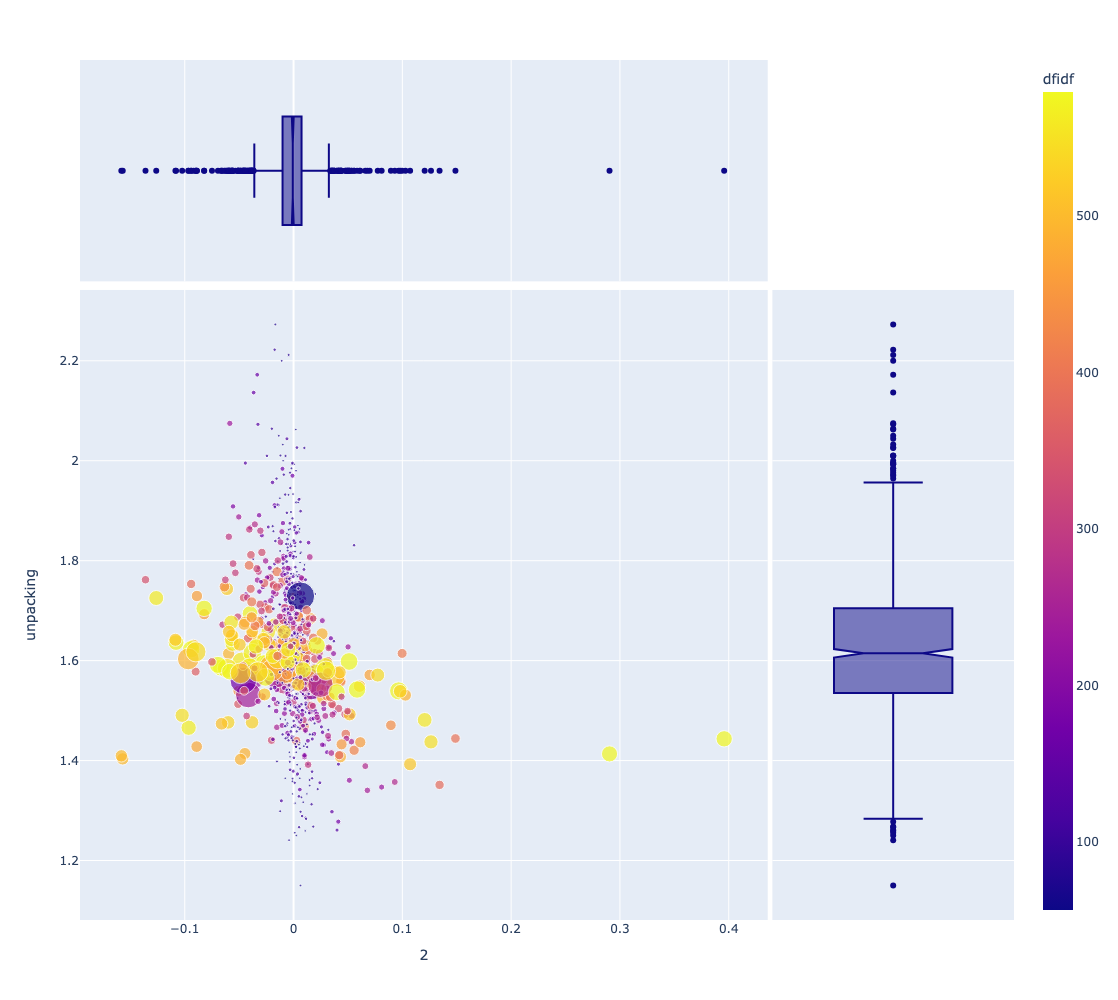

In [36]:
px.scatter(collapsed_term_rater_scores, '2', 'unpacking', hover_name='term_str', 
           size='df', color='dfidf',
           marginal_x='box', marginal_y='box', height=1000)

In [39]:
fig = px.scatter(collapsed_term_rater_scores, '2', 'unpacking', hover_name='term_str', 
           size='df', color='dfidf',
           marginal_x='box', marginal_y='box', height=1000, title = "Relationship between unpacking problem quality and <br> third principal component loadings for words in corpus")
fig.write_image(f"{output_dir}/01_figures/riff3.png")